In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR


In [2]:
lv=pd.read_csv('Cost_of_Living_Index_2022.csv')
lv

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Afghanistan,20.37,2.72,12.09,14.92,12.41,23.04
1,2,Albania,35.50,8.47,22.83,29.32,25.82,30.19
2,3,Algeria,26.87,4.59,16.43,28.82,14.48,24.63
3,4,Argentina,34.69,7.71,22.04,28.17,33.32,30.72
4,5,Armenia,33.89,11.61,23.45,27.59,30.55,28.86
...,...,...,...,...,...,...,...,...
134,135,Venezuela,43.20,9.99,27.63,37.34,46.23,15.41
135,136,Vietnam,37.48,13.22,26.11,38.70,19.98,29.38
136,137,Yemen,53.14,6.71,31.38,67.12,24.74,14.41
137,138,Zambia,33.04,9.26,21.90,31.53,22.46,40.33


In [4]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            139 non-null    int64  
 1   Country                         139 non-null    object 
 2   Cost of Living Index            139 non-null    float64
 3   Rent Index                      139 non-null    float64
 4   Cost of Living Plus Rent Index  139 non-null    float64
 5   Groceries Index                 139 non-null    float64
 6   Restaurant Price Index          139 non-null    float64
 7   Local Purchasing Power Index    139 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 8.8+ KB


In [5]:
lv.shape

(139, 8)

In [6]:
lv.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,70.000000,50.188633,19.291511,35.705324,46.637842,43.444892,46.426259
std,40.269923,20.860222,15.317726,17.542523,20.952229,24.885969,26.921840
min,1.000000,19.920000,2.720000,12.090000,14.920000,12.410000,1.450000
25%,35.500000,34.715000,9.515000,23.310000,31.200000,25.290000,27.040000
50%,70.000000,44.680000,13.930000,31.260000,40.220000,34.560000,37.220000
75%,104.500000,62.580000,25.070000,44.865000,56.590000,54.925000,66.105000
max,139.000000,146.040000,98.580000,123.800000,148.660000,159.170000,118.440000


In [7]:
lv.isnull().mean()*100

Rank                              0.0
Country                           0.0
Cost of Living Index              0.0
Rent Index                        0.0
Cost of Living Plus Rent Index    0.0
Groceries Index                   0.0
Restaurant Price Index            0.0
Local Purchasing Power Index      0.0
dtype: float64

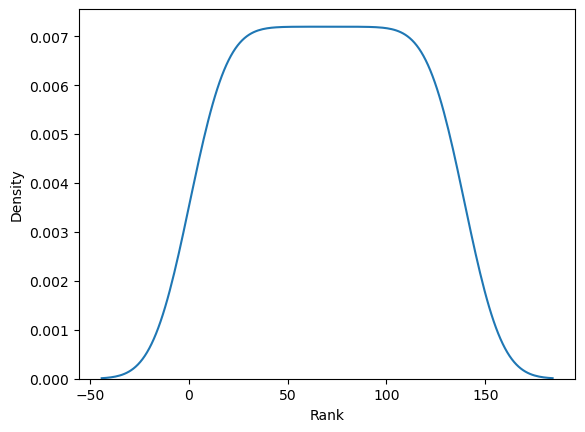

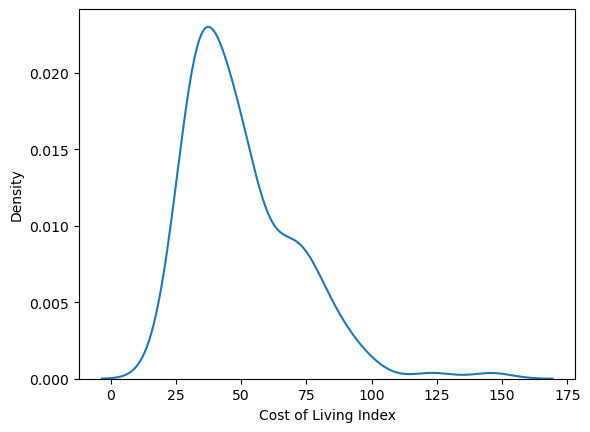

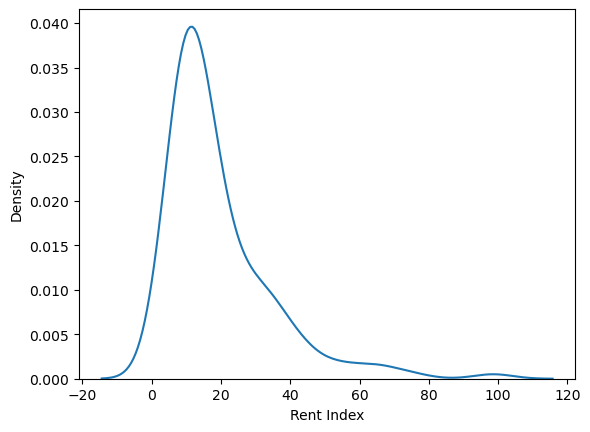

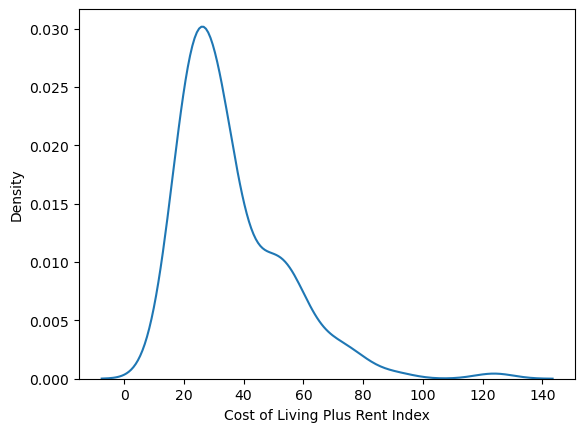

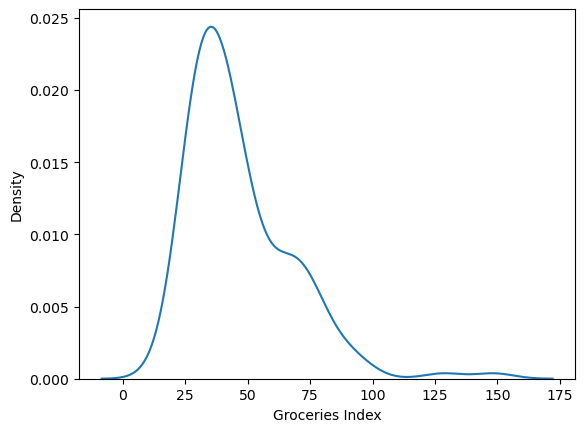

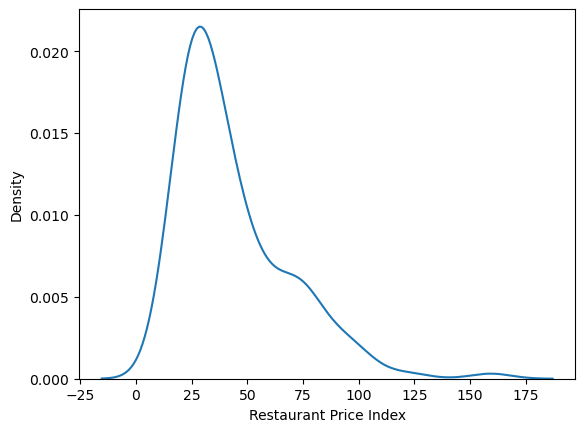

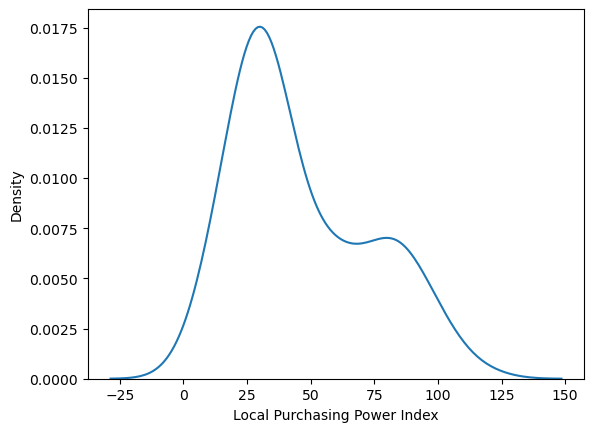

In [10]:
for i in lv.columns:
    if lv[i].dtype!='object':
        sns.kdeplot(lv[i])
        plt.show()

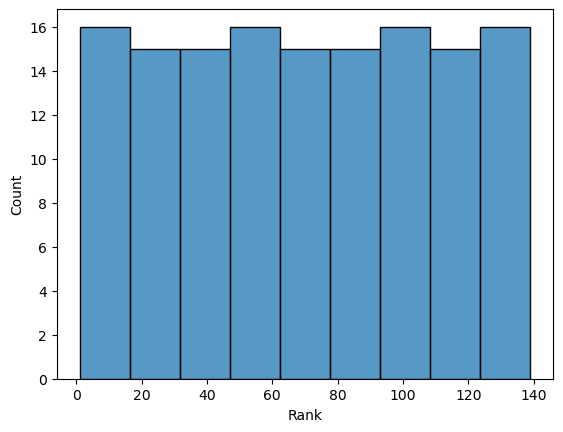

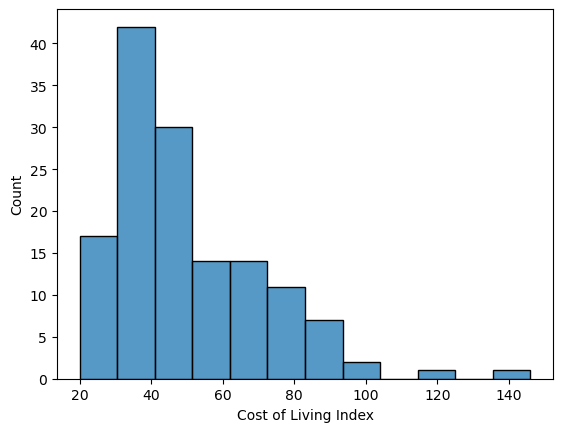

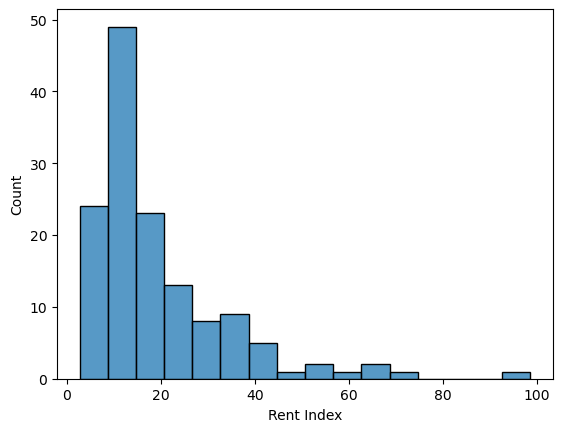

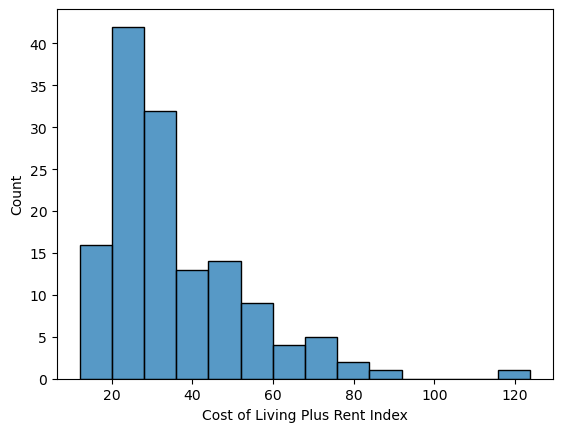

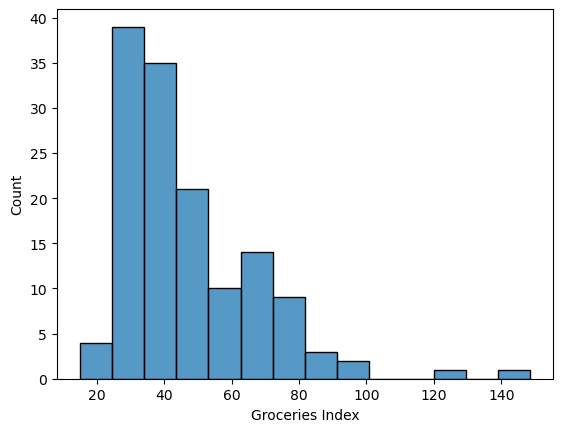

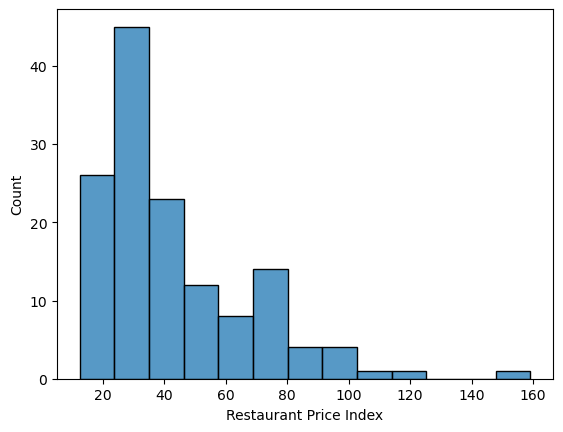

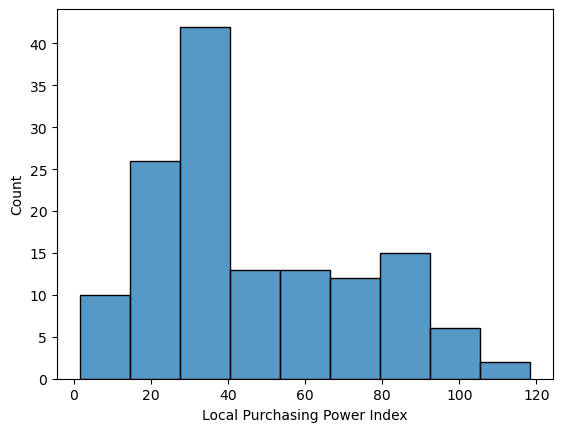

In [11]:
for i in lv.columns:
    if lv[i].dtype!='object':
        sns.histplot(lv[i])
        plt.show()

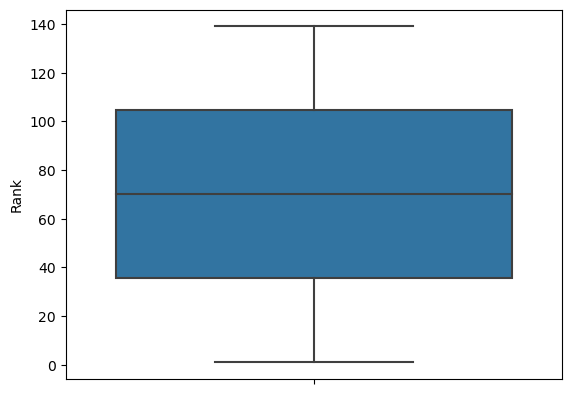

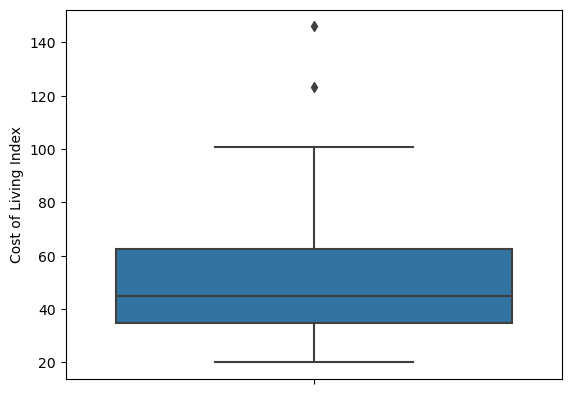

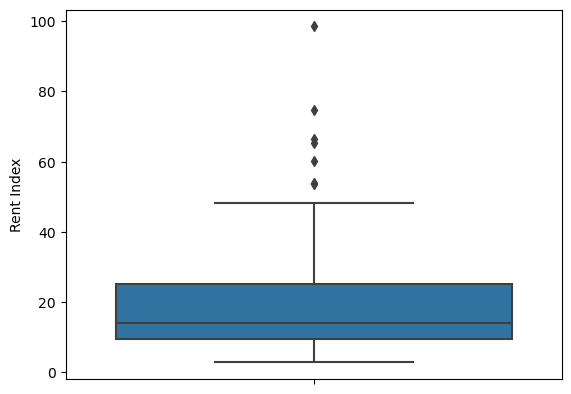

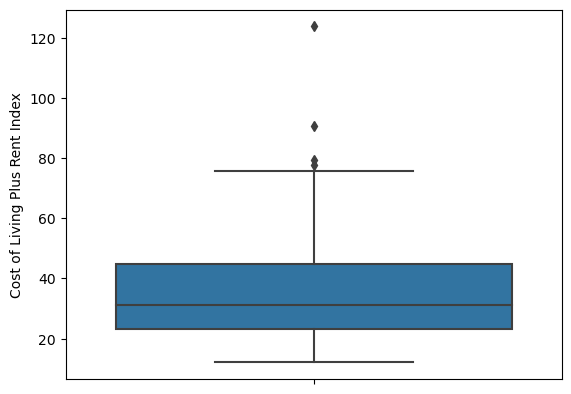

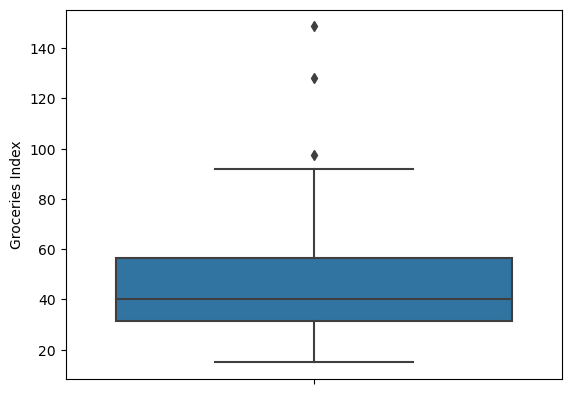

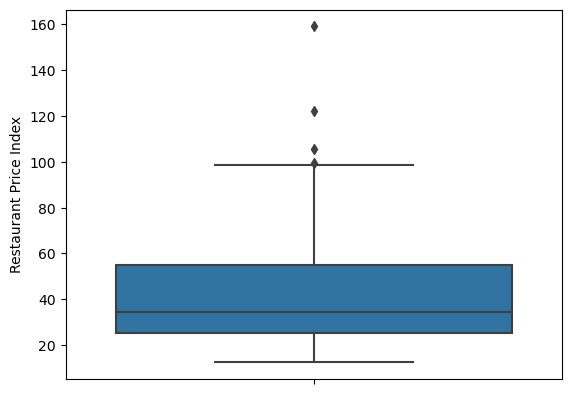

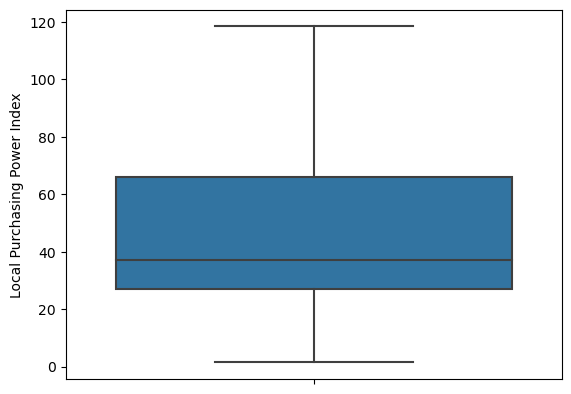

In [13]:
for i in lv.columns:
    if lv[i].dtype!='object':
        sns.boxplot(y=lv[i])
        plt.show()

In [14]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [15]:
for column in lv.columns:
    if lv[column].dtype!='object':
        UL,LL=outlier_limit(lv[column])
        lv[column]=np.where((lv[column]>UL)|(lv[column]<LL),np.nan,lv[column])

In [16]:
lv.isna().sum()

Rank                              0
Country                           0
Cost of Living Index              2
Rent Index                        7
Cost of Living Plus Rent Index    4
Groceries Index                   3
Restaurant Price Index            4
Local Purchasing Power Index      0
dtype: int64

In [19]:
lv.dropna(inplace=True)

In [21]:
lv.shape

(130, 8)

In [29]:
lv.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bolivia', 'Bosnia And Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland',
       'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo (Disputed Territory)',
       'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macao',
       'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova',
       'Mongolia', 'Montenegro', '

In [32]:
la=LabelEncoder()
lv['Country']=la.fit_transform(lv['Country'])

In [33]:
lv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 138
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            130 non-null    float64
 1   Country                         130 non-null    int32  
 2   Cost of Living Index            130 non-null    float64
 3   Rent Index                      130 non-null    float64
 4   Cost of Living Plus Rent Index  130 non-null    float64
 5   Groceries Index                 130 non-null    float64
 6   Restaurant Price Index          130 non-null    float64
 7   Local Purchasing Power Index    130 non-null    float64
dtypes: float64(7), int32(1)
memory usage: 8.6 KB


<AxesSubplot:>

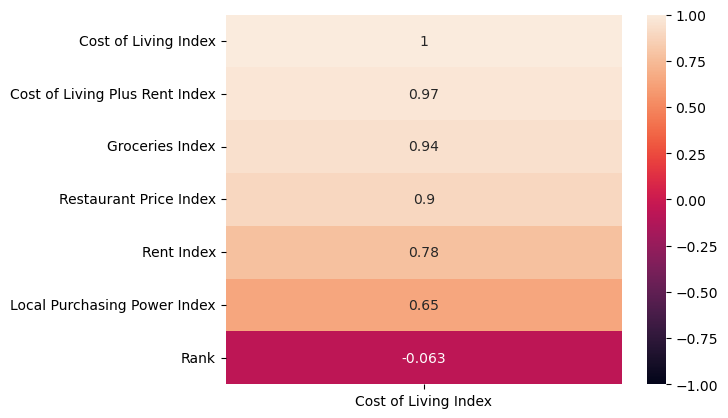

In [25]:
sns.heatmap(lv.corr()[["Cost of Living Index"]].sort_values(by="Cost of Living Index",ascending=False),vmin=-1,vmax=1,annot=True)

In [28]:
rlv.columns

Index(['Rank', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index'],
      dtype='object')

In [34]:
x=lv[['Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Rent Index']].values
y=lv[['Cost of Living Index']].values

In [35]:
rs=RobustScaler()

In [36]:
x=rs.fit_transform(x)

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'RandomForestRegressor':RandomForestRegressor()
}

In [43]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('training_score:', training_score)
    print('testing_score:',testing_score)
    print('score:',score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse:',rmse)
    print('-'*100)
    

model trained with LinearRegression
training_score: 99.99998218031423
testing_score: 99.99998057143208
score: 99.99998057143208
mae: 0.005926940480034222
mse: 5.1529010104739556e-05
rmse: 0.007178370992414613
----------------------------------------------------------------------------------------------------
model trained with Ridge
training_score: 99.31091611687314
testing_score: 99.4771650991373
score: 99.4771650991373
mae: 1.0103917079586133
mse: 1.3866778553432473
rmse: 1.177572866256372
----------------------------------------------------------------------------------------------------
model trained with LinearSVR
training_score: 97.70448855916763
testing_score: 98.8013952921584
score: 98.8013952921584
mae: 1.4295854422061547
mse: 3.17897409475066
rmse: 1.782967777260896
----------------------------------------------------------------------------------------------------
model trained with DecisionTreeRegressor
training_score: 100.0
testing_score: 92.64695975010555
score: 92.646959

In [44]:
model=RandomForestRegressor()

In [45]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
y_pred=model.predict(x)

In [47]:
out=pd.DataFrame(zip(y,y_pred),columns=('actual','prediction'),dtype=float)

In [48]:
out

,actual,prediction
0,20.37,21.0755
1,35.50,35.1747
2,26.87,27.0737
3,34.69,34.8836
4,33.89,34.2642
...,...,...
125,43.20,40.7834
126,37.48,37.9796
127,53.14,50.8940
128,33.04,33.3232


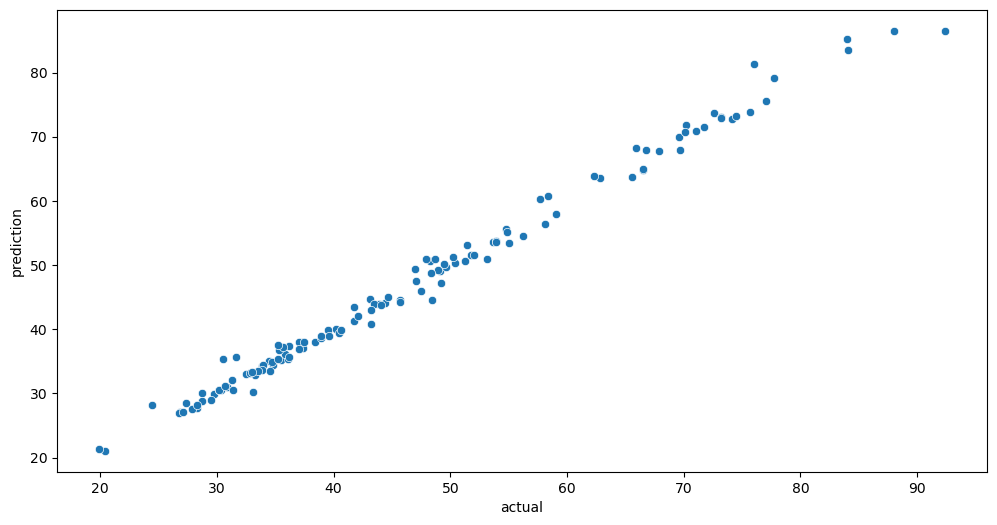

In [55]:
plt.figure(figsize=[12,6])
sns.scatterplot(data=out,x='actual',y='prediction')
plt.show()